In [1]:
from scipy.spatial.distance import pdist, squareform
from collections import defaultdict
from itertools import product
from pathlib import Path

import time
import scipy
import random
import numpy as np
import ringity as rng
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def smoothening(x, n):
    cumsum = np.cumsum(x) 
    result = np.zeros_like(x)
    for i in range(n):
        result[i]    = np.mean(x[:i+1])
        result[-i-1] = np.mean(x[-i-1:])
    result[n//2:-n//2] = (cumsum[n:] - cumsum[:-n]) / n
    return result

In [3]:
blues  = sns.color_palette('Blues', 3)[::-1]
reds   = sns.color_palette('Reds', 3)[::-1]
greens = sns.color_palette('Greens', 3)[::-1]
purples = sns.color_palette('Purples', 3)[::-1]
blacks = sns.color_palette('gray', 3)[::-1]

colors = [blues, reds, greens, purples, blacks]

# Network model explanation

## Idea - (Soft) Random Geometric Graphs

In [73]:
back_col = '#AEE3ED'
node_col = '#1A7D90'
edge_col = '#1A7D90'

In [74]:
ds = 2.4

In [75]:
N   = 2**8
rho = 0.05
a = 0.5
beta = 1

posis, G = rng.network_model(N, rho, beta, a, True)
x_pos, y_pos = np.cos(posis), np.sin(posis)
pos = dict(enumerate(zip(x_pos+ds,y_pos)))

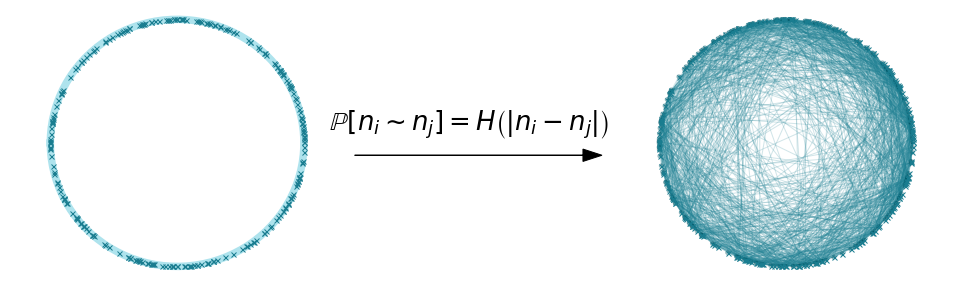

In [76]:
fig, ax = plt.subplots(figsize=(17,5))
ax.set_axis_off()

circle = np.linspace(-np.pi,np.pi,100)
x_circ, y_circ = np.cos(circle), np.sin(circle)

ax.plot(x_circ -ds, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_pos-ds, y_pos, 'x', color = node_col,markersize=5)

ax.arrow(-1,-0.1,1.8,0, head_width=0.1, fc='k', ec='k')
ax.annotate(r'$\mathbb{P}[n_i \sim n_j] = H \left(|n_i-n_j| \right)$', 
                 (-1.2,0.1), fontsize=26)

#ax.plot(x_circ +ds, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_pos+ds, y_pos, 'x', color = node_col,markersize=5)
rng.plot_nx(G, pos=pos, ax=ax, edge_colors = edge_col)

---

## Connection function $H$ has two parameters: $a, \rho$

![title](../../../awesome_meeting/diagram.pdf)

<br/>

---

## Paramter $\rho$ is regulating the density by assuring that 
$$\frac{2}{N(N-1)}\sum_{i<j}H\left(\vert n_i - n_j\vert\right) \approx \rho$$

In [77]:
RHO = 0.2

posis, G = rng.network_model(N, RHO, beta, a, True)
x_pos, y_pos = np.cos(posis), np.sin(posis)
pos = dict(enumerate(zip(x_pos+ds/2,y_pos)))

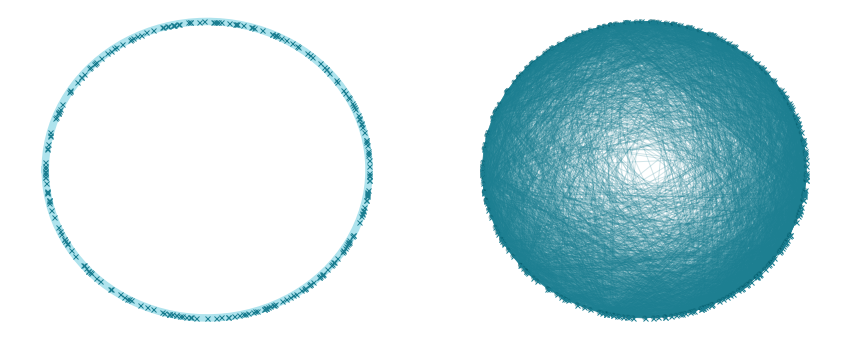

In [78]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_axis_off()

circle = np.linspace(-np.pi,np.pi,100)
x_circ, y_circ = np.cos(circle), np.sin(circle)

ax.plot(x_circ -1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_pos-1.5, y_pos, 'x', color = node_col,markersize=5)

#ax.plot(x_circ +1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_pos+ds/2, y_pos, 'x', color = node_col,markersize=5)
rng.plot_nx(G, pos=pos, ax=ax, edge_colors = edge_col)

---

## Parameter $\beta$ changes distribution along the circle

In [79]:
BETA = 0.5

posis, G = rng.network_model(N, rho, BETA, a, True)
x_pos, y_pos = np.cos(posis), np.sin(posis)
pos = dict(enumerate(zip(x_pos+ds/2,y_pos)))

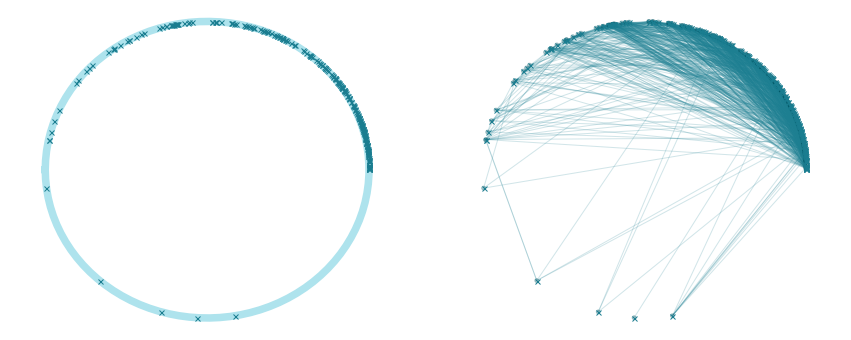

In [80]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_axis_off()

circle = np.linspace(-np.pi,np.pi,100)
x_circ, y_circ = np.cos(circle), np.sin(circle)

ax.plot(x_circ -1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_pos-1.5, y_pos, 'x', color = node_col,markersize=5)

#ax.plot(x_circ +1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_pos+ds/2, y_pos, 'x', color = node_col,markersize=5)
rng.plot_nx(G, pos=pos, ax=ax, edge_colors = edge_col)

## Parameter $a$ changes the transition $\texttt{distance} \stackrel{s_a}{\longrightarrow} \texttt{similarity}$
 - for $a=0.5$ we have $\texttt{similarity} = 1- \frac{\texttt{distance}}{\pi}$
     
     
 - for $a<0.5$ there is a minimal probability $\texttt{prob}_{\min} > 0$ such that $F_{\eta,\rho}(0) = \texttt{prob}_{\min}$

In [87]:
A = 0.2

posis, G = rng.network_model(N, rho, beta, A, True)
x_pos, y_pos = np.cos(posis), np.sin(posis)
pos = dict(enumerate(zip(x_pos+ds/2,y_pos)))

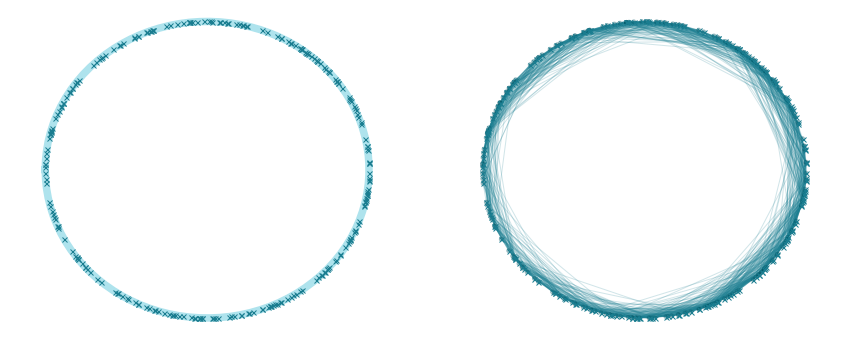

In [88]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_axis_off()

circle = np.linspace(-np.pi,np.pi,100)
x_circ, y_circ = np.cos(circle), np.sin(circle)

ax.plot(x_circ -1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_pos-1.5, y_pos, 'x', color = node_col,markersize=5)

#ax.plot(x_circ +1.5, y_circ, color = back_col, linewidth = 7.5)
ax.plot(x_pos+ds/2, y_pos, 'x', color = node_col,markersize=5)
rng.plot_nx(G, pos=pos, ax=ax, edge_colors = edge_col)

# Experiments

## delay $\beta$ vs ring-score $\texttt{score}$

In [16]:
n_ensemble = 5
n_sample   = 10

N   = 2**8
rho = 0.2
a_list = [0.125, 0.25, 0.5]
betas = np.linspace(0,1,n_sample)

t1 = time.time()
for a,beta in product(a_list,betas):
    t2 = time.time()
    print(f"a={a:.3f}, beta={beta:.1f}, time={t2-t1:.2f}", end='\r')
    tmp = 0
    for i in range(n_ensemble):
        while True:
            G = rng.network_model(N, rho, beta=beta, a=a)
            if nx.is_connected(G):
                break
            else:
                print("not connected" + 20*' ')
        tmp += rng.diagram(G).score
    np.save(f"/Users/markusyoussef/Desktop/awesome_meeting/{beta}_{a}.npy",
            np.array(tmp/n_ensemble))

not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected                    
not connected 

### Load results

In [17]:
n_sample   = 10

a_list = [0.125, 0.25, 0.5]
betas = np.linspace(0,1,n_sample)

score_dic = {a:np.array([np.load(f"/Users/markusyoussef/Desktop/awesome_meeting/{beta}_{a}.npy") 
                             for beta in betas])
                for a in a_list}

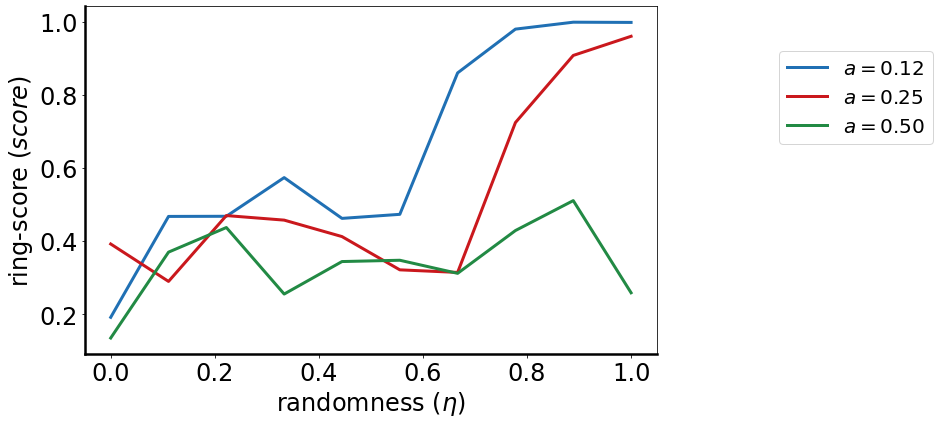

In [18]:
fix, ax = plt.subplots(figsize=(15,6))

a_list = [#0.0625, 
          0.125, 
          0.25, 
          0.5]
for idx_a, a in enumerate(a_list):
    ax.plot(betas, score_dic[a], 
            linewidth = 3, 
            label = rf'$a={a:.2f}$',
            color = colors[idx_a][0])

ax.set_xlabel(r'randomness $(\eta)$', fontsize=24)
ax.set_ylabel(r'ring-score $(score)$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=1, bbox_to_anchor=(1, 0.4, 0.5, 0.5))
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_score.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_score.pdf")

## delay $\beta$ vs avg. clustering coefficient $c$

In [12]:
def avg_clustering(G):
    A = nx.to_scipy_sparse_matrix(G, format='lil')
    A.setdiag(0)
    A = scipy.sparse.csc_matrix(A)
    A2 = A@A
    o0 = A.sum(axis=1).A
    numer = A.multiply(A2).sum(axis=1).A

    D_denom = o0*o0 - o0

    C_D = np.true_divide(numer, D_denom,
                         out   = np.nan*np.empty_like(numer, dtype=float),
                         where = D_denom!=0).flatten()
    
    return np.nanmean(C_D)

In [13]:
n_ensemble = 3
n_sample   = 6

N   = 2**9
rho = 0.1
a_list = np.linspace(1,0,8,endpoint=False)
betas = np.linspace(0,1,n_sample)
c_dict = defaultdict(list)

t1 = time.time()
for a,beta in product(a_list,betas):
    t2 = time.time()
    print(f"a={a:.3f}, beta={beta:.1f}, time={t2-t1:.2f}", end='\r')
    tmp = 0
    for i in range(n_ensemble):
        G = rng.network_model(N, rho, beta=beta,a=a)
        tmp += avg_clustering(G)
    c_dict[a].append(tmp/n_ensemble)

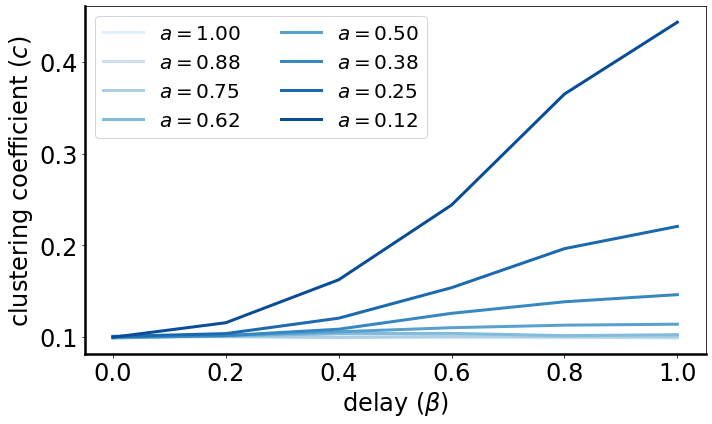

In [14]:
fix, ax = plt.subplots(figsize=(10,6))

for idx_a, a in enumerate(a_list):
    ax.plot(betas, c_dict[a], 
            linewidth = 3, 
            label = rf'$a={a:.2f}$',
            color = sns.color_palette('Blues',len(a_list))[idx_a])

ax.set_xlabel(r'delay $(\beta)$', fontsize=24)
ax.set_ylabel(r'clustering coefficient $(c)$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=2)
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/beta_vs_c.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/beta_vs_c.pdf")

## delay $\beta$ vs avg. path-length $d$

In [6]:
n_ensemble = 3
n_sample   = 6

N   = 2**9
rho = 0.1
a_list = np.linspace(1,0,8,endpoint=False)
betas = np.linspace(0,1,n_sample)
d_dict = defaultdict(list)

t1 = time.time()
for a,beta in product(a_list,betas):
    t2 = time.time()
    print(f"a={a:.3f}, beta={beta:.1f}, time={t2-t1:.2f}", end='\r')
    tmp = 0
    for i in range(n_ensemble):
        for i in range(100):
            G = rng.network_model(N, rho, beta=beta,a=a)
            if nx.is_connected(G):
                tmp += nx.average_shortest_path_length(G)
                break
        else:
            print("Fuck.")
            print()
            tmp += np.inf
    d_dict[a].append(tmp/n_ensemble)

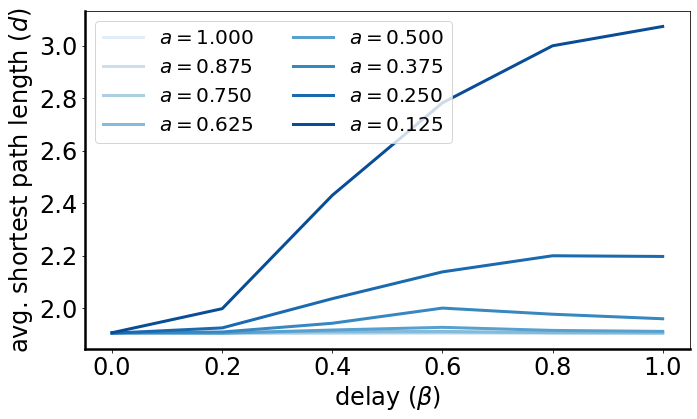

In [16]:
fix, ax = plt.subplots(figsize=(10,6))

for idx_a, a in enumerate(a_list):
    ax.plot(betas, d_dict[a], 
            linewidth = 3, 
            label = rf'$a={a:.3f}$',
            color = sns.color_palette('Blues',len(a_list))[idx_a])

ax.set_xlabel(r'delay $(\beta)$', fontsize=24)
ax.set_ylabel(r'avg. shortest path length $(d)$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=2)
plt.tight_layout()
#plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/beta_vs_d.png")
#plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/beta_vs_d.pdf")

## avg. path-length $d$ vs avg. clustering coefficient $c$

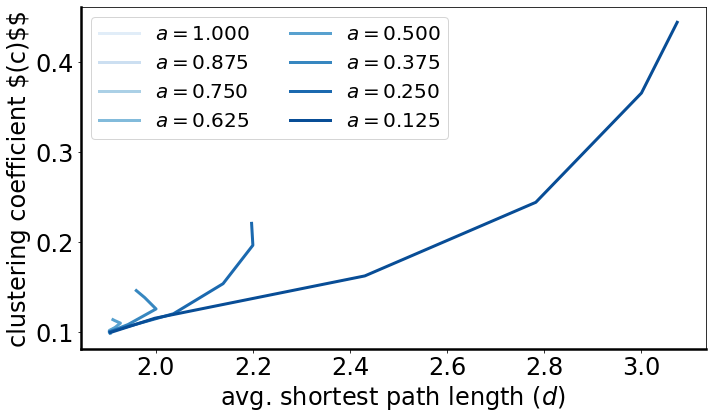

In [22]:
fix, ax = plt.subplots(figsize=(10,6))

for idx_a, a in enumerate(a_list):
    ax.plot(d_dict[a], c_dict[a], 
            linewidth = 3, 
            label = rf'$a={a:.3f}$',
            color = sns.color_palette('Blues',len(a_list))[idx_a])

ax.set_xlabel(r'avg. shortest path length $(d)$', fontsize=24)
ax.set_ylabel(r'clustering coefficient $(c)$$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=2)
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/d_vs_c.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/d_vs_c.pdf")

## delay $\beta$ vs alg. connectivity $\gamma$

In [23]:
n_ensemble = 30
n_sample   = 30

N   = 2**9
rho = 0.1
a_list = np.linspace(1,0,10,endpoint=False)
betas = np.linspace(0,1,n_sample)
gamma_dict = defaultdict(list)

t1 = time.time()
for a,beta in product(a_list,betas):
    t2 = time.time()
    print(f"a={a:.3f}, beta={beta:.2f}, time={t2-t1:.2f}", end='\r')
    tmp = 0
    for i in range(n_ensemble):
        G = rng.network_model(N, rho, beta=beta,a=a)
        tmp += nx.spectrum.normalized_laplacian_spectrum(G)[1]
    gamma_dict[a].append(tmp/n_ensemble)

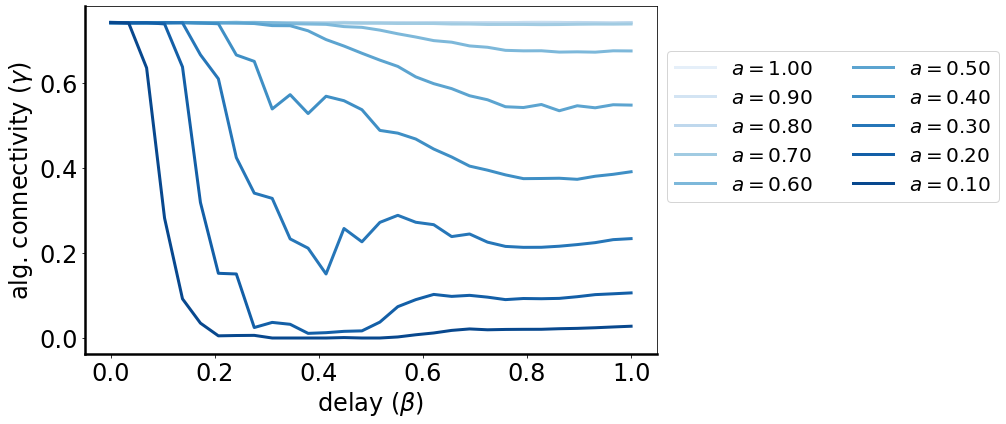

In [28]:
fix, ax = plt.subplots(figsize=(15,6))

for idx_a, a in enumerate(a_list):
    ax.plot(betas, gamma_dict[a], 
            linewidth = 3, 
            label = rf'$a={a:.2f}$',
            color = sns.color_palette('Blues',len(a_list))[idx_a])

ax.set_xlabel(r'delay $(\beta)$', fontsize=24)
ax.set_ylabel(r'alg. connectivity $(\gamma)$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=2, bbox_to_anchor=(1, 0.4, 0.5, 0.5))
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/beta_vs_gamma.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/beta_vs_gamma.pdf")

## delay $\beta$ vs alg. connectivity $\texttt{score}$

In [39]:
n_ensemble = 5
n_sample   = 5

N   = 2**9
rho = 0.1
a_list = np.linspace(1,0,5,endpoint=False)
betas = np.linspace(0,1,n_sample)
score_dict = defaultdict(list)

t1 = time.time()
for a,beta in product(a_list,betas):
    t2 = time.time()
    print(f"a={a:.3f}, beta={beta:.2f}, time={t2-t1:.2f}", end='\r')
    tmp = 0
    for i in range(n_ensemble):
        while True:
            G = rng.network_model(N, rho, beta=beta,a=a)
            if nx.is_connected(G):
                break
        tmp += rng.diagram(G).score
    score_dict[a].append(tmp/n_ensemble)

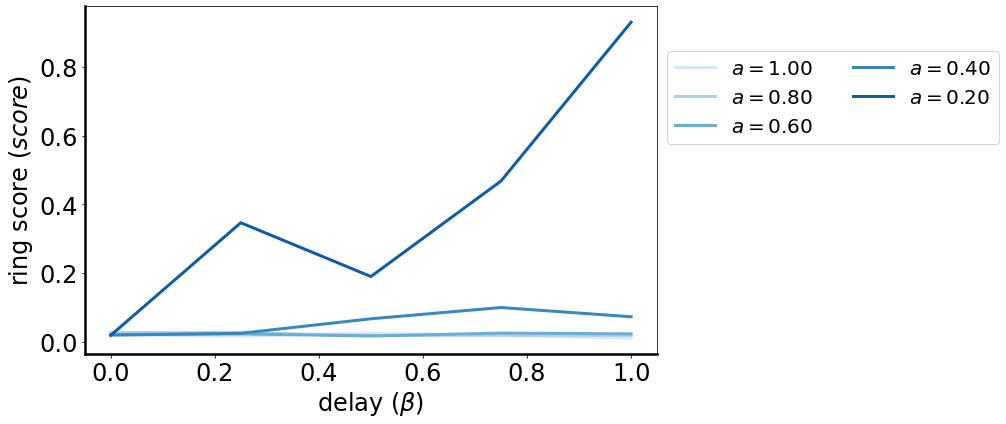

In [42]:
fix, ax = plt.subplots(figsize=(15,6))

for idx_a, a in enumerate(a_list):
    ax.plot(betas, score_dict[a], 
            linewidth = 3, 
            label = rf'$a={a:.2f}$',
            color = sns.color_palette('Blues',len(a_list))[idx_a])

ax.set_xlabel(r'delay $(\beta)$', fontsize=24)
ax.set_ylabel(r'ring score $(score)$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=2, bbox_to_anchor=(1, 0.4, 0.5, 0.5))
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/beta_vs_score.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/beta_vs_score.pdf")

## window size $a$ vs avg. clustering coefficient $c$

In [5]:
def avg_clustering(G):
    A = nx.to_scipy_sparse_matrix(G, format='lil')
    A.setdiag(0)
    A = scipy.sparse.csc_matrix(A)
    A2 = A@A
    o0 = A.sum(axis=1).A
    numer = A.multiply(A2).sum(axis=1).A

    D_denom = o0*o0 - o0

    C_D = np.true_divide(numer, D_denom,
                         out   = np.nan*np.empty_like(numer, dtype=float),
                         where = D_denom!=0).flatten()
    
    return np.nanmean(C_D)

In [8]:
n_ensemble = 3
n_sample   = 15

N   = 2**10
rho = 0.05
kappas = np.logspace(-2,2,4)

a_arr = np.linspace(0.5,0,n_sample, endpoint=False)[::-1]
c_dic = {kappa:np.zeros_like(a_arr) for kappa in kappas}

for kappa in kappas:
    for idx, a in enumerate(a_arr):
        print(f"{a:.2f}", end='\r')
        tmp = 0
        for i in range(n_ensemble):
            G = rng.network_model(N, rho, a=a, kappa=kappa)
            tmp += avg_clustering(G)
        c_dic[kappa][idx] = tmp/n_ensemble
            

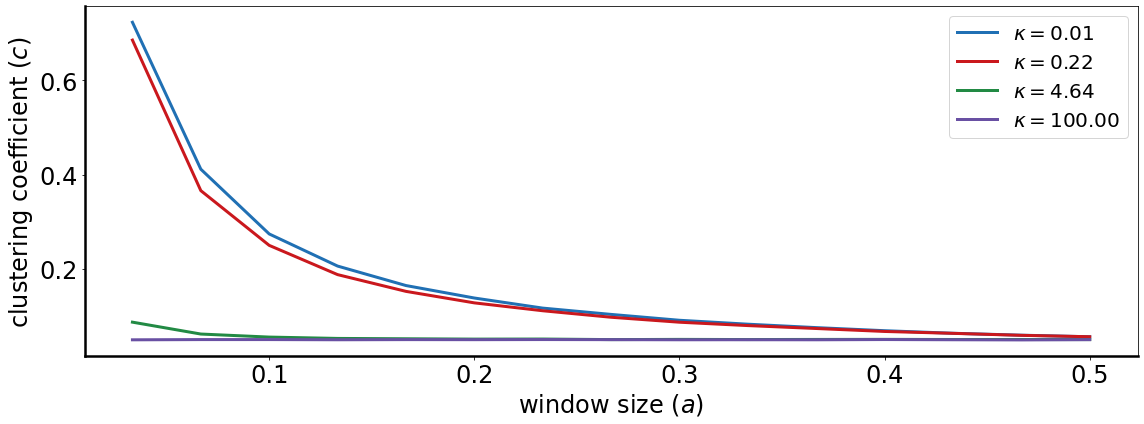

In [13]:
fix, ax = plt.subplots(figsize=(16,6))

for idx_kappa,kappa in enumerate(kappas):
    ax.plot(a_arr, c_dic[kappa], 
            linewidth = 3, 
            label = rf'$\kappa={kappa:.2f}$',
            color = colors[idx_kappa][0])

ax.set_xlabel(r'window size $(a)$', fontsize=24)
ax.set_ylabel(r'clustering coefficient $(c)$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/a_va_c.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/a_va_c.pdf")

## randomness $\eta$ vs spectrum gap $\texttt{spec}$

In [ ]:
n_ensemble = 3
n_sample   = 10

N   = 2**10
rho = 0.05
a_list = [0.125, 0.25, 0.5]
kappas = np.linspace(0,1,3)

eta_arr = np.linspace(1,0,n_sample, endpoint=False)[::-1]
spec_dic = {a:{kappa:np.zeros_like(eta_arr) 
              for kappa in kappas}
              for a in a_list}

t1 = time.time()
for a,kappa in product(a_list,kappas):
    for idx,eta in enumerate(eta_arr):
        t2 = time.time()
        print(f"a={a:.3f}, kappa={kappa:.1f}, eta={eta:.2f}, time={t2-t1:.2f}", end='\r')
        tmp = 0
        for i in range(n_ensemble):
            G = rng.network_model(N, rho, a=a, eta=eta, kappa=kappa)
            tmp += nx.spectrum.normalized_laplacian_spectrum(G)[1]
        spec_dic[a][kappa][idx] = tmp/n_ensemble

In [ ]:
blues  = sns.color_palette('Blues', len(kappas))
reds   = sns.color_palette('Reds', len(kappas))
greens = sns.color_palette('Greens', len(kappas))
purples = sns.color_palette('Purples', len(kappas))

colors = [blues, reds, greens, purples]

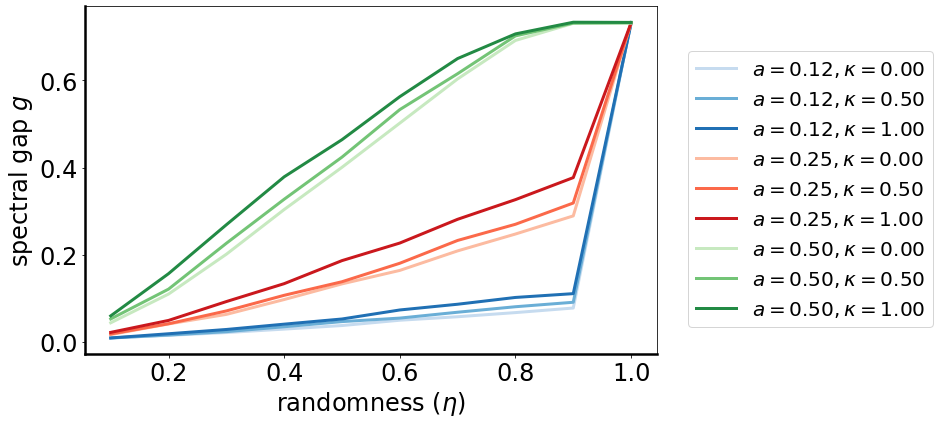

In [5]:
fix, ax = plt.subplots(figsize=(15,6))

a_list = [#0.0625, 
          0.125, 
          0.25, 
          0.5]
for idx_a, a in enumerate(a_list):
    for idx_kappa,kappa in enumerate(kappas):
        ax.plot(eta_arr, spec_dic[a][kappa], 
                linewidth = 3, 
                label = rf'$a={a:.2f}, \kappa={kappa:.2f}$',
                color = colors[idx_a][idx_kappa])

ax.set_xlabel(r'randomness $(\eta)$', fontsize=24)
ax.set_ylabel(r'spectral gap $g$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=1, bbox_to_anchor=(1, 0.4, 0.5, 0.5))
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_spec.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_spec.pdf")

# Results from Azure

## randomness $\eta$ vs ring-score $\texttt{score}$

In [20]:
directory = Path("/Users/markusyoussef/Desktop/awesome_meeting/data/")

a2idx = {a:idx for idx,a in enumerate([0.125,0.25,0.5])}
kappa2idx = {kappa:idx for idx,kappa in enumerate([0.,0.5,1.0])}

In [21]:
score_data = dict()
for file_path in directory.glob('scores/*'):
    eta,a,kappa = map(float,file_path.stem.split('_'))
    score_data[(eta,a,kappa)] = list(map(float,file_path.read_text().strip().split()))
    
score_mean = defaultdict(list)
eta_list = defaultdict(list)
a_kappa_set = set()
for (eta,a,kappa),data in score_data.items():
    score_mean[(a,kappa)].append(np.mean(data))
    eta_list[(a,kappa)].append(eta)
    a_kappa_set.add((a,kappa))

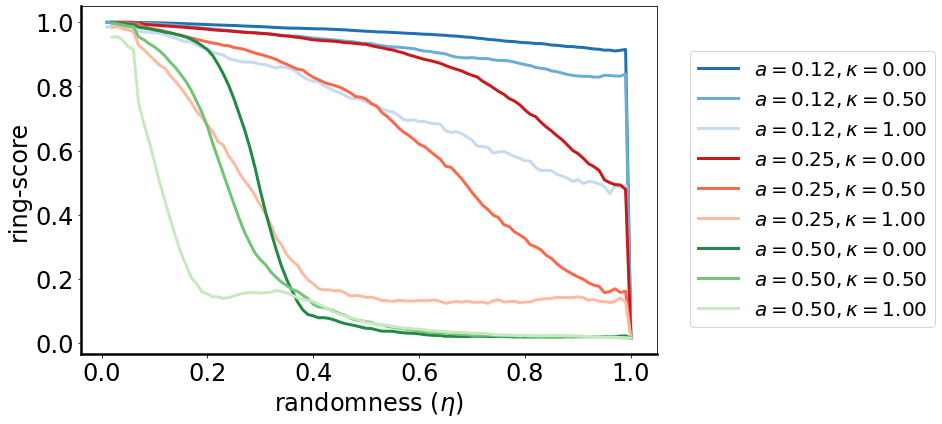

In [29]:
N = 10
fix, ax = plt.subplots(figsize=(15,6))

for (a,kappa) in sorted(a_kappa_set):
    #ax.plot(eta_list[(a,kappa)], score_mean[(a,kappa)], '*',
    #        color = colors[a2idx[a]][kappa2idx[kappa]])
    
    x,y = zip(*sorted(zip(eta_list[(a,kappa)], score_mean[(a,kappa)])))
    y = smoothening(y,N)
    
    x = list(x)
    x.append(1.)
    y = list(y)
    y.append(0.016)
    
    ax.plot(x,y, linewidth = 3, 
            label = rf'$a={a:.2f}, \kappa={kappa:.2f}$',
            color = colors[a2idx[a]][kappa2idx[kappa]])

ax.set_xlabel(r'randomness $(\eta)$', fontsize=24)
ax.set_ylabel(r'ring-score', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=1, bbox_to_anchor=(1, 0.4, 0.5, 0.5))
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_score_azure.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_score_azure.pdf")

## randomness $\eta$ vs spectrum gap $\texttt{spec}$

In [9]:
directory = Path("/Users/markusyoussef/Desktop/awesome_meeting/data/")

a2idx = {a:idx for idx,a in enumerate([0.125,0.25,0.5])}
kappa2idx = {kappa:idx for idx,kappa in enumerate([0.,0.5,1.0])}

In [10]:
gap_data = dict()
for file_path in directory.glob('gaps/*'):
    eta,a,kappa = map(float,file_path.stem.split('_'))
    gap_data[(eta,a,kappa)] = list(map(float,file_path.read_text().strip().split()))
    
gap_mean = defaultdict(list)
eta_list = defaultdict(list)
a_kappa_set = set()
for (eta,a,kappa),data in gap_data.items():
    gap_mean[(a,kappa)].append(np.mean(data))
    eta_list[(a,kappa)].append(eta)
    a_kappa_set.add((a,kappa))

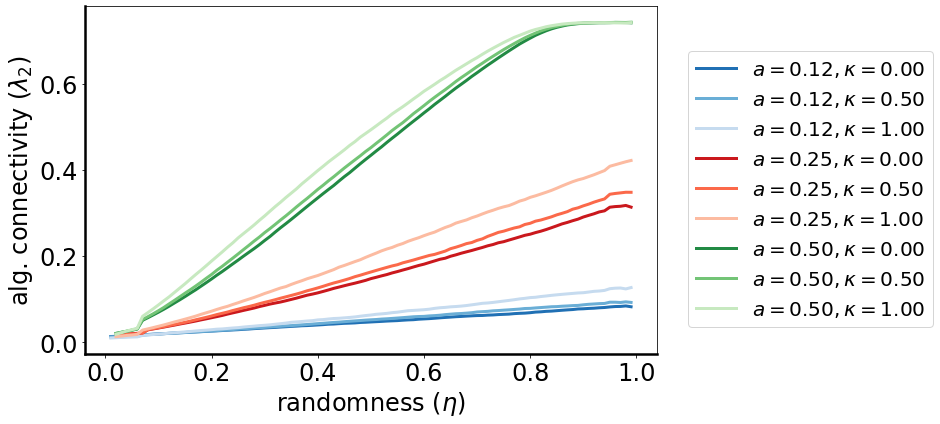

In [11]:
N = 10
fix, ax = plt.subplots(figsize=(15,6))

for (a,kappa) in sorted(a_kappa_set):
    #ax.plot(eta_list[(a,kappa)], score_mean[(a,kappa)], '*',
    #        color = colors[a2idx[a]][kappa2idx[kappa]])
    
    x,y = zip(*sorted(zip(eta_list[(a,kappa)], gap_mean[(a,kappa)])))
    y = smoothening(y,N)
    ax.plot(x,y, linewidth = 3, 
            label = rf'$a={a:.2f}, \kappa={kappa:.2f}$',
            color = colors[a2idx[a]][kappa2idx[kappa]])

ax.set_xlabel(r'randomness $(\eta)$', fontsize=24)
ax.set_ylabel(r'alg. connectivity $(\lambda_2)$', fontsize=24)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=1, bbox_to_anchor=(1, 0.4, 0.5, 0.5))
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_spec_azure.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/eta_va_spec_azure.pdf")

## ring-score $\texttt{score}$ vs spectrum gap $\texttt{spec}$

In [12]:
directory = Path("/Users/markusyoussef/Desktop/awesome_meeting/data/")

a2idx = {a:idx for idx,a in enumerate([0.125,0.25,0.5])}
kappa2idx = {kappa:idx for idx,kappa in enumerate([0.,0.5,1.0])}

In [13]:
score_data = dict()
for file_path in directory.glob('scores/*'):
    eta,a,kappa = map(float,file_path.stem.split('_'))
    if a != 0.5:
        continue
    score_data[(eta,a,kappa)] = list(map(float,file_path.read_text().strip().split()))
    
gap_data = dict()
for file_path in directory.glob('gaps/*'):
    eta,a,kappa = map(float,file_path.stem.split('_'))
    if a != 0.5:
        continue
    gap_data[(eta,a,kappa)] = list(map(float,file_path.read_text().strip().split()))
    
gaps   = defaultdict(list)
scores = defaultdict(list)
a_kappa_set = set()
for (eta,a,kappa) in gap_data.keys():
    gaps[(a,kappa)].append(gap_data[  (eta,a,kappa)])
    scores[(a,kappa)].append(score_data[(eta,a,kappa)])
    a_kappa_set.add((a,kappa))
    
gaps = {key:[gap for gap_list in value for gap in gap_list] for key,value in gaps.items()}
scores = {key:[score for score_list in value for score in score_list] for key,value in scores.items()}

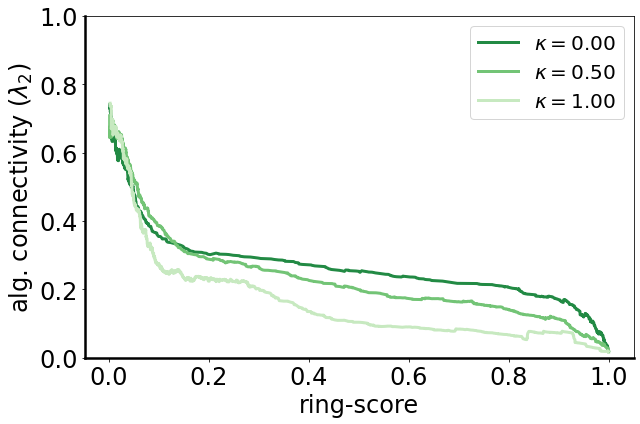

In [21]:
N = 100
fix, ax = plt.subplots(figsize=(9,6))

for (a,kappa) in sorted(a_kappa_set):
    #ax.plot(eta_list[(a,kappa)], score_mean[(a,kappa)], '*',
    #        color = colors[a2idx[a]][kappa2idx[kappa]])
    
    x,y = zip(*sorted(zip(scores[(a,kappa)], gaps[(a,kappa)])))
    x,y = x[:-1], y[:-1]
    y = smoothening(y,N)
    ax.plot(x,y, linewidth = 3, 
            label = rf'$\kappa={kappa:.2f}$',
            color = colors[a2idx[a]][kappa2idx[kappa]])

ax.set_xlabel(r'ring-score', fontsize=24)
ax.set_ylabel(r'alg. connectivity $(\lambda_2)$', fontsize=24)

ax.set_ylim(0,1)

rng.ax_setup(ax)
plt.legend(fontsize=20, ncol=1)#, bbox_to_anchor=(1, 0.4, 0.5, 0.5))
plt.tight_layout()
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/score_vs_conn_azure.png")
plt.savefig("/Users/markusyoussef/Desktop/awesome_meeting/score_vs_conn_azure.pdf")

# Percolation

In [62]:
N = 2**8
rho = 0.1
eta = 0

G = rng.network_model(N, rho, eta=0)
score = rng.diagram(G).score

In [71]:
def main(N, rho, eta, nr):
    directory = Path("/Users/markusyoussef/Desktop/awesome_meeting/data/percolation")
    G = rng.network_model(N, rho, eta=eta)
    score = rng.diagram(G).score
    data = [(N, score)]
    
    for i in range(N-1):
        print(i, end='\r')
        G.remove_node(*random.sample(list(G),1))
        H = nx.induced_subgraph(G, max(nx.connected_components(G), key=len))
        if len(H) == 1:
            break
        score = rng.diagram(H).score
        data.append((len(H), score))

    with open(directory / f"{eta}_{nr}.csv", 'w') as f:
        for lcc,score in data:
            f.write(f"{lcc};{score}\n")

In [72]:
N = 2**8
rho = 0.1
eta_list = [0,0.01]
n_ensemble = 3

for eta,nr in product(eta_list,range(n_ensemble)):
    main(N, rho, eta, nr)